In [84]:
#sqlalchemy-challenge 
import warnings 
warnings.filterwarnings('ignore')

#import dependencies
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt 

In [85]:
motor = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [86]:
#reflect an existing bas on the automap
base=automap_base()

In [87]:
# refelct tables
base.prepare(motor, reflect=True)

base.classes.keys()

['measurement', 'station']

In [88]:
#save references to each table
measurement=base.classes.measurement
station= base.classes.station

In [89]:
session= Session (engine)

In [92]:
#setting ar=Anualrain

anual_rain=session.query(measurement.date).order_by(measurement.date.desc()).first()
anual_rain=anual_rain[0]
print (anual_rain)

2017-08-23


In [93]:
#ly=lastyear
last_year = dt.datetime.strptime(anual_rain, "%Y-%m-%d") - dt.timedelta(days=366)
print(last_year)

2016-08-22 00:00:00


In [95]:
#retrieve the data an precipitation scores
query_base= session.query(measurement.date, measurement.prcp).filter(measurement.date >= last_year).all()
print(query_base)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [96]:
#prcp=precipitation

prec_data= pd.DataFrame(query_base,columns= ['date', 'precipitation'])
# este paso se puede saltar
prec_data.set_index('date', inplace=True)
prec_data.head()

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [97]:
prec_data = prec_data.sort_values(by='date',ascending=True)
prec_data.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


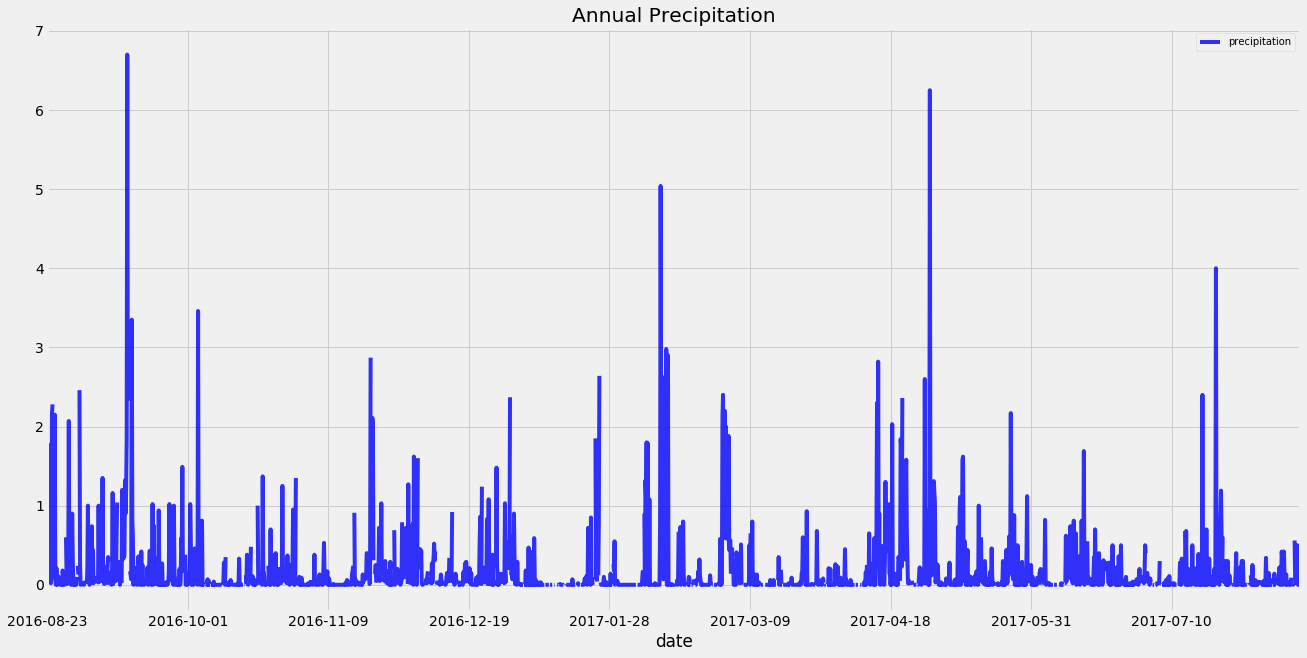

In [98]:
#plotting via matplotlib
prec_data.plot (title="Annual Precipitation", color='blue', alpha = 0.8, figsize = (20,10))
plt.legend(loc = 'upper right', prop={'size':10})
plt.savefig ("annual_prec.png")
plt.show()

In [99]:
#use pandas to calculate summary statistics  
prec_data.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [100]:
querie_2= session.query(measurement.station, measurement.date).filter(measurement.date >= ly).all()
session_data= pd .DataFrame (querie_2,columns=['station', 'date'])
session_data.head()

,station,date
0,USC00519397,2016-08-24
1,USC00519397,2016-08-25
2,USC00519397,2016-08-26
3,USC00519397,2016-08-27
4,USC00519397,2016-08-28


In [101]:
session_1=session_data ['station'].nunique()
print(s)

7


In [102]:
count_acts = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station). order_by(func.count(measurement.station).desc()).all()
print(count_acts)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [103]:
est_acts = acts
est_acts = session.query(func.min(measurement.tobs),
                            func.max(measurement.tobs),
                            func.avg(measurement.tobs)).all()
print(est_acts)

[(53.0, 87.0, 73.09795396419437)]


In [106]:
#basic stats pf the most active station
station_active = session.query(measurement.station, func.count(measurement.tobs)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).first()
station_active = station_active[0]
print(station_active)

USC00519281


In [67]:
# Now, Basic stats of the most active station (mas)
mas_basics = mas
mas_basics = session.query(func.min(measurement.tobs),
                           func.max(measurement.tobs),
                           func.avg(measurement.tobs)).filter(measurement.station == "USC00519281").all()
# Print results
print(mas_basics)

[(54.0, 85.0, 71.66378066378067)]


In [107]:
# Choose the station with the highest number of temperature observations.
temp = session.query(measurement.station, func.count(measurement.tobs)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).first()
temp = temp[0]
print(temp)



USC00519281


In [110]:
# Choose the station with the highest number of temperature observations.
temp = session.query(measurement.station, func.count(measurement.tobs)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).first()
temp = temp[0]
print(temp)
# Query the last 12 months of temperature observation data (tod)
# for [the station with the highest number of temperature observations] 
temp = session.query( measurement.tobs).filter(measurement.date >= ly).filter(measurement.station == "USC00519281").all()
temp_data = pd.DataFrame(temp, columns=['temperature'])
temp_data.head()




USC00519281


,temperature
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0


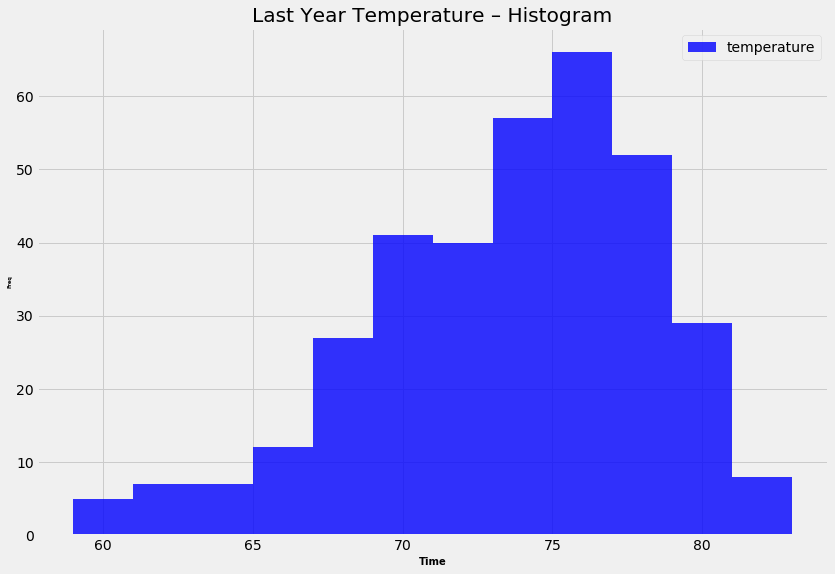

In [113]:
# Plot the results as a histogram
temp_data.plot.hist(bins=12, title="Last Year Temperature – Histogram", color='blue', alpha=0.8, figsize=(12,8))
plt.tight_layout()
plt.style.use('fivethirtyeight')

plt.xlabel("Time", weight="bold", size=10);
plt.ylabel("Freq", weight="bold", size=5)

plt.savefig("histogram_temp_12m.png")
plt.show()



In [73]:
session.query(measurement.date).\
    order_by(measurement.date.asc()).first()

('2010-01-01')

In [77]:
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [78]:
calc_temps('2017-04-06', '2017-04-11')
tmin, tavg, tmax = calc_temps('2017-04-06', '2017-04-11')[0]

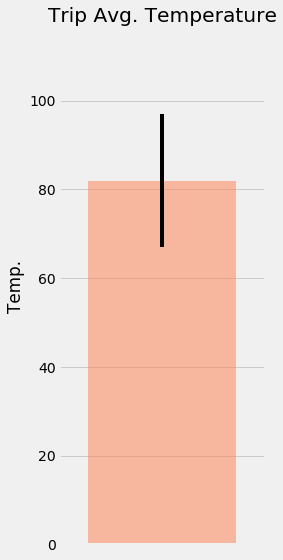

In [79]:
fig, ax = plt.subplots(figsize=plt.figaspect(2.))


x = 1
yerr = tmax - tmin

bar = ax.bar(x,tmax,yerr= yerr, color= "coral",align="center", alpha= .50)
ax.margins(.2,.2)
ax.set(xticks=range(x),xticklabels="a",title="Trip Avg. Temperature",ylabel="Temp.")

fig.tight_layout()
fig.show()

In [81]:
start_date = "2016-04-06"
end_date = "2016-04-11"

sel = [station.station, station.name, station.latitude, station.longitude,\
       station.elevation, func.sum(measurement.prcp)]

result = session.query(*sel).\
        filter(measurement.station == station.station).\
        filter(measurement.date >= start_date).\
        filter(measurement.date <= end_date).\
        group_by(station.name).order_by(func.sum(measurement.prcp).desc()).all()

print(result)

[('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 2.46), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 2.16), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 1.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.38), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.02), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0)]


In [83]:
def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]